# Forest Fires in the Brazilian Amazon: Anthropogenic and Climate Influences on the World Largest Tropical Rainforest
### David Mitchell Krug, B00684937, Dalhousie University, BIOL3789
#### November 14th, 2019

### *Introduction*

Forest fires are an extremely powerful force of nature that can shape ecosystems and influence the structural and natural dynamics of forest environments (Cochran 2008). Forest fires typically have occurred under natural fire regimes characterized by the frequency, size, intensity, seasonality, type and severity of the fires (Flannigan 2000). Fire regimes in different forest ecosystems vary based on the aforementioned factors, but when one of these factors is altered the entire regime shifts (Cochrane 2008). Human land-use, and its impacts on the forest such as fragmentation from the building of roads, deforestation and the intentional lighting of fires to clear land fundamentally changes the way fires affect these biomes (Cochrane 2008). The effects of climate change also influence the prevalence of forest fires due to the interactions of altered weather and temperatures with other damaging anthropogenic impacts (Cochrane 2008, Flannigan 2000). 

The Amazon forest, spread across 7 countries, covers 5.5 million km2 and is home to over half of the worlds remaining tropical rainforest (Laurance 1998). Approximately two thirds of the Amazon basin are in Brazil, and nowhere are the impacts of deforestation felt more (Laurence 1998). In the Brazilian Amazon basin, deforestation increased from 1.1 million hectares/year in 1991 to 2 million hectares/year in 1995-1997 (Laurance 1998). Despite the selective nature of tropical logging for only the largest trees, forest damage can be pervasive due to the heavy equipment needed to remove the trees from the forest and the extensive network of logging roads and other infrastructure needed to support the industry (Cochrane 2008, Laurance 1998). The impacts of road and infrastructure development can lead to “collateral” tree damage, soil compaction from heavy machinery, soil erosion and nutrient leeching and changes to the forest’s sub canopy climate (Laurance 1998). The development of roads has also lead to the colonization of previously unreachable parts of the Amazon, where which migrant settlers use destructive slash and burn techniques to clear land for farming (Laurance 1998). It has also been noted that close to 80% of the logging in the Brazilian Amazon is done illegally, limiting the ability to regulate this highly destructive practice (Laurance 1998). 

This study will analyze the incidence of forest fires from 1998-2017 from all 23 of Brazil’s states. We will determine if the number of forest fires each year has significantly increased over a 20-year period, and which of Brazils states has had the most fires. It is predicted that due to the continued logging that occurs in the Amazon, the prevalence of forest destruction and the continued warming of our climate, the number of forest fires will have increased significantly over the past 20 year. 

### Methods and Results

The data set used in this study, "Forest Fires in Brazil" was aquired from the online data science website *Kaggle*, and was created by Luís Gustavo Modelli using data from Brazil's National Forest Information System (SNIF). The data set was dowloaded as ".csv" file and uploaded to the online Jupyter folder "BIOL 3782".

In [1]:
#The ".csv" was 'read' into the jupyter notebook and the header displayed to ensure it is in the proper format.
amazon_fires=read.csv("amazon_fires.csv")
head(amazon_fires)

year,state,month,number,date
<int>,<fct>,<fct>,<dbl>,<fct>
1998,Acre,Janeiro,0,1998-01-01
1999,Acre,Janeiro,0,1999-01-01
2000,Acre,Janeiro,0,2000-01-01
2001,Acre,Janeiro,0,2001-01-01
2002,Acre,Janeiro,0,2002-01-01
2003,Acre,Janeiro,10,2003-01-01


In [ ]:
#The packages 'dplyr' and 'ggplot' were used to format the data and create plots. 
library(dplyr)
library(ggplot2)

The following code is used to calculate the total number of fires for each year in Brazil over the past 20 years. Firstly, a data frame is created to summarize the total number of fires each year across all states in Brazil. A linear regression is performed to determine if there is a significant difference in the number of fire over the past 20 years.


Call:
lm(formula = fires_year$`sum(number)` ~ fires_year$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-8723.6 -2623.4   146.6  1832.6 10755.4 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -1277040.3   356071.1  -3.586  0.00211 **
fires_year$year      653.5      177.4   3.685  0.00170 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4574 on 18 degrees of freedom
Multiple R-squared:   0.43,	Adjusted R-squared:  0.3983 
F-statistic: 13.58 on 1 and 18 DF,  p-value: 0.001696


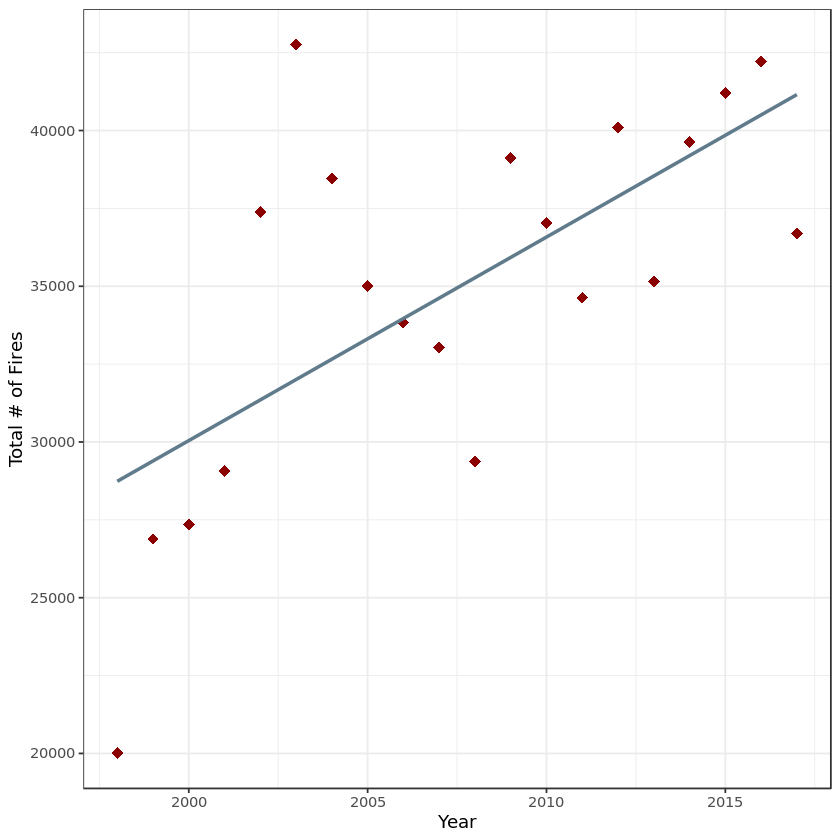

In [8]:
fires_year=amazon_fires %>% group_by(year) %>% summarise(sum(number))
plot_fires_years=ggplot(fires_year, aes(x=fires_year$year,y=fires_year$`sum(number)`)) + 
  geom_point(shape=18, color="darkred", size=3) + geom_smooth(method = "lm", se = FALSE, color="lightskyblue4") + labs(x="Year", y="Total # of Fires") +
  theme_bw()
plot_fires_years
lm_fire_year=lm(fires_year$`sum(number)`~fires_year$year)
summary(lm_fire_year)

As observed in the plot above, there is a significant (p=<0.05, R^2=0.43) increase in the number of forest fires in Brazil between 1998 and 2017. 

Next, the state with the highest average number of forest fires over the past 20 years was determined. A data frame was created summarizing the total number of fires in each state from each year. A model was used to determine if there was significant differences in the average number of fires by state over the past 20 years. A boxplot was used to visually determine which of the states had the highest average number of forest fires.


Call:
lm(formula = fires_state_year$`sum(number)` ~ factor(fires_state_year$state))

Residuals:
    Min      1Q  Median      3Q     Max 
-2410.9  -326.5   -15.0   326.2  3376.4 

Coefficients:
                                               Estimate Std. Error t value
(Intercept)                                      923.20     144.81   6.375
factor(fires_state_year$state)Alagoas           -691.00     204.79  -3.374
factor(fires_state_year$state)Amapa              168.38     204.79   0.822
factor(fires_state_year$state)Amazonas           609.30     204.79   2.975
factor(fires_state_year$state)Bahia             1314.11     204.79   6.417
factor(fires_state_year$state)Ceara              598.20     204.79   2.921
factor(fires_state_year$state)Distrito Federal  -745.15     204.79  -3.639
factor(fires_state_year$state)Espirito Santo    -595.90     204.79  -2.910
factor(fires_state_year$state)Goias              961.57     204.79   4.696
factor(fires_state_year$state)Maranhao           333.26 

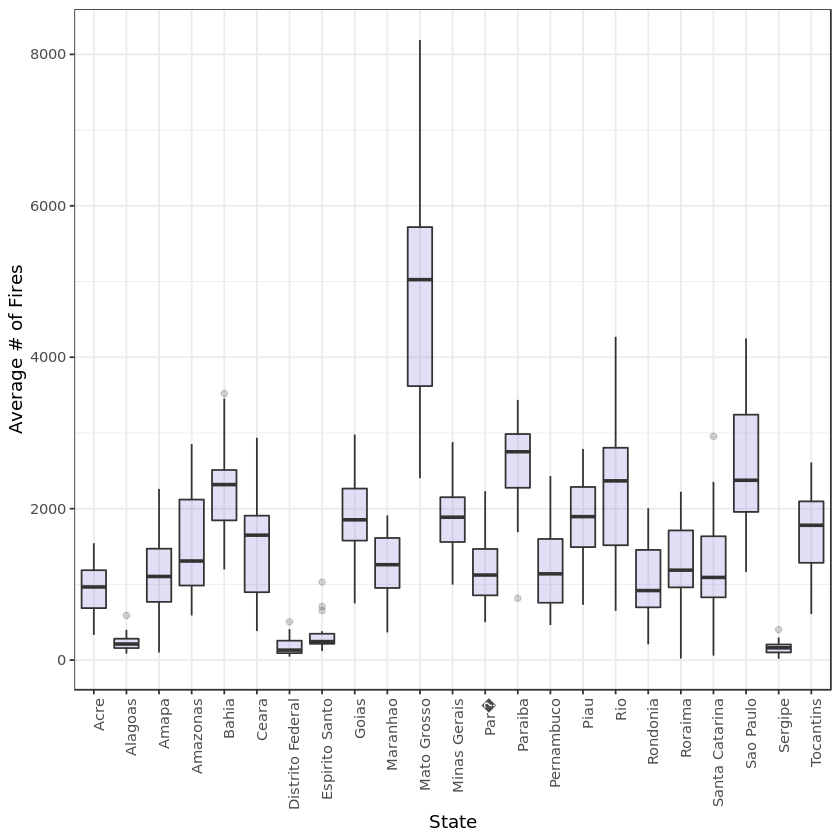

In [9]:
#Total number of fires over the past 20 year by State
fires_state_year=amazon_fires %>% group_by(state, year) %>% summarise(sum(number))
plot_box_fires_state_years=ggplot(fires_state_year, aes(x=factor(fires_state_year$state), y=fires_state_year$`sum(number)`)) + 
  geom_boxplot(fill="slateblue", alpha=0.2) + labs(x="State", y="Average # of Fires") + theme_bw() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plot_box_fires_state_years  
lm_fire_states=lm(fires_state_year$`sum(number)`~ factor(fires_state_year$state))
summary(lm_fire_states)

There were significant differences in the average number of forest fires in each state. From the model, Mato Grosso was determined to have the most significantly different value. This was also observed in the plot above, where Mato Grosso was shown to have the highest average number of forest fires over the past 20 years.

Finally, the number of forest fires each year in the state of Mato Grosso were plotted and a linear model was created to determine if there was a significant difference between the number of fires each year. A data frame was created summarizing the total number of forest fires each year for the state of Mato Grosso.


Call:
lm(formula = fires_Mato_Grosso_year$`sum(number)` ~ fires_Mato_Grosso_year$year)

Residuals:
    Min      1Q  Median      3Q     Max 
-2234.0  -794.3  -154.8   456.2  3186.8 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)  
(Intercept)                 -248991.65  103911.85  -2.396   0.0276 *
fires_Mato_Grosso_year$year     126.43      51.76   2.443   0.0251 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1335 on 18 degrees of freedom
Multiple R-squared:  0.2489,	Adjusted R-squared:  0.2072 
F-statistic: 5.966 on 1 and 18 DF,  p-value: 0.02513


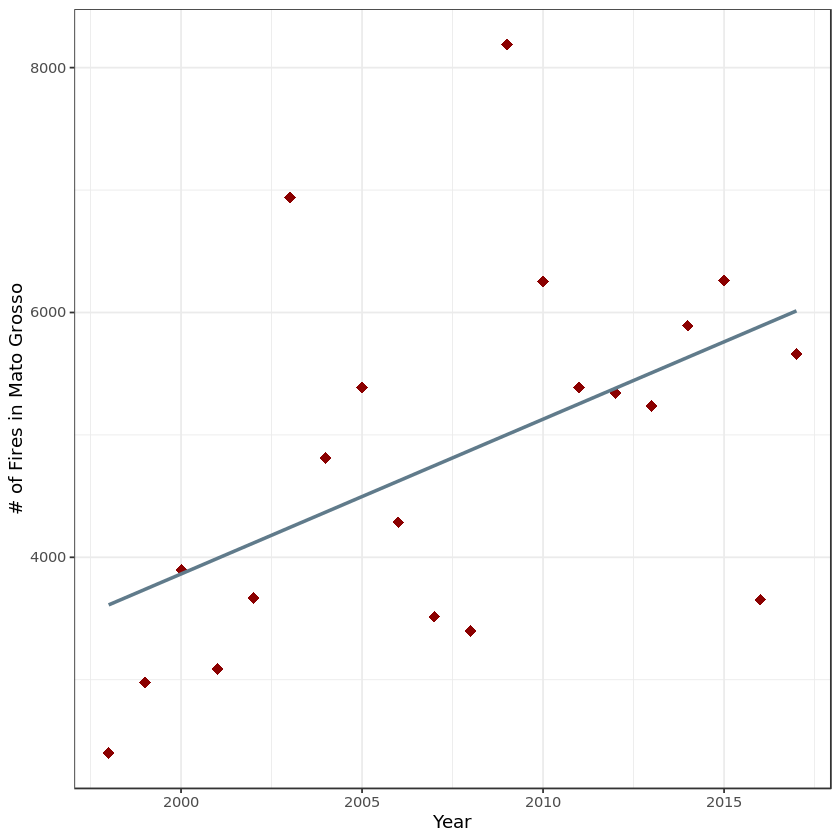

In [7]:
#Total number of fires each  year over 20 years in Mato Grosso State, Brazil 
fires_Mato_Grosso_year=fires_state_year %>% filter(state=="Mato Grosso")
plot_fires_Mato_Grosso=ggplot(fires_Mato_Grosso_year, aes(x=fires_Mato_Grosso_year$year,y=fires_Mato_Grosso_year$`sum(number)`)) + 
  geom_point(shape=18, color="darkred", size=3) + geom_smooth(method = "lm", se = FALSE, color="lightskyblue4") +
  theme_bw() + labs(x="Year", y="# of Fires in Mato Grosso")
plot_fires_Mato_Grosso
lm_fires_Mato_Grosso=lm(fires_Mato_Grosso_year$`sum(number)`~fires_Mato_Grosso_year$year)
summary(lm_fires_Mato_Grosso)

As observed in the plot above, there is a significant (p=<0.05, R^2=0.25) increase in the number of forest fires in the state of Mato Grosso in Brazil between 1998 and 2017. 

### *Discussion*

The incidence of forest fires in Brazil has been shown to increase between 1998 to 2017 as demonstrated through the result obtained in this study. A significant positive relationship (p=<0.05, R2=0.43) was determined between the total number of fires each year over the course of the 20-year data. The increase in the number of fires each year could be attributed to several factors know to alter the regimes of forest fires such as increased human land-use in forested areas, forest fragmentation from the building of roads, logging and deforestation, the intentional lighting of fires and increasingly the added impacts of climate change (Lawrence 1998, Cochrane 2008, Flannigan 2000). Despite forest fires occurring naturally, intact rainforests are known to be resistant and resilient to forest fires and the effects of changing climate (Lawrence 1998). The resistance of rainforests to fires is a function of their ability to trap moisture, block wind, light and buffer temperatures in the forest’s understory (Cochrane 2008). Once a fire has damaged a portion of rainforest and removed the important canopy cover that provides resistance, the forest is prone to future fire (Cochrane 2008). 

Fires are also known to increase in fragmented and disturbed rain forests as the unique structure of the forest is lost, becoming more prone to anthropogenic fires and ignition (Lawrence 1998, Cochrane 2008). Logging increases the amount available fuel for fires to burn in the form of slash piles created when cutting underbrush and trees to build roads and access large trees (Lawrence 1998). Fragmentation also puts more of the forest in close contact with human-use land such as farm and pasture land which are known to be prone to fire (Lawrence 1998). 

The Brazilian state with the greatest number of fires, Mato Grosso, experienced a significant increase in the number of fires over the course of the 20 years of data (p=<0.05, R2=0.25). Mato Grosso, Brazil’s third largest state and the southernmost range of the Amazon basin, is known to have the highest deforestation rate in the country (Morton et al. 2006, Fearnside 2003). Between 2001-2004, 87% of the cropland expansion and 40% of new deforestation in Brazil’s legal Amazon occurred in Mato Grosso (Morton et al. 2006). The impacts of deforestation and other anthropogenic activities coupled with the influences of climate change undoubtedly has influenced the significant increase in fires in Mato Grosso.

Forest fires in the Amazon have huge impacts on the health and function of forest ecosystems (Lawrence 1998), however, most pressingly, the loss of the Amazon rainforest from fires has important implications in its contribution to global atmospheric CO2 and climate change (Morton et al. 2006). The deforestation of the Amazon is the largest contributor of CO2 emissions in Brazil (Morton et al. 2006). The Amazon is known to be one of the largest long-term ecosystem carbon sinks in the world (Brienen et al. 2015). The cycle of climactic warming and the increase in forest fires has created a positive feedback loop where the loss of stored carbon in the Amazon only further increases atmospheric CO2, contributing to the warming of the earth’s climate and the subsequent increase in the risk of forest fires.  

### References

Brienen, R. J.W., Phillips, O. L., Feldpausch, T. R., Gloor, E., Baker, T. R., Lloyd, J., Lopez-Gonzalez, G., Monteagudo-Mendoza, A., Malhi, Y., Lewis, S. L., Vásquez Martinez, R.  et al. 2015. Long-term decline of the Amazon carbon sink. Nature. 519(7543):344-348. 10.1038/nature14283

Cochrane, M., Laurence, W. F. 2008. Synergism among fires, land use, and climate change in the Amazon. Ambio. 37(7/8):522-527. 134.190.177.98

Fearnside, P.M. 2003. Amazon Forest Deforestation Control in Mato Grosso : A New Model for Slowing the Loss of Brazil ' s Amazon Forest. Ambio. 32(5):343-345. 134.190.177.98

Flannigan, M. D., Stocks, B. J., Wotton, B. M. 2000. Climate change and forest fires. Science of the Total Environment. 262(3):221-229. 10.1016/S0048-9697(00)00524-6

Gustavo Modelli, L., Brazil's National Forest Information System (SNIF). 2019. Forest Fires in Brazil. Kaggle. Version 1. https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil/metadata

Laurance, W. F. 1998. A crisis in the making: Responses of Amazonian forests to land use and climate change. Trends in Ecology and Evolution. 13(10):411-415. 10.1016/S0169-5347(98)01433-5

Morton, D. C., DeFries, R. S., Shimabukuro, Y. E., Anderson, Liana O., Arai, E., Del Bon Espirito-Santo, F., Freitas, R., Morisette, J. 2006. Cropland expansion changes deforestation dynamics in the southern Brazilian Amazon. Proceedings of the National Academy of Sciences of the United States of America. 103(39):14637-14641. 10.1073/pnas.0606377103